In [13]:
#K Nearest Neighbor Classification
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Breast_Cancer.csv')

In [15]:
print(df.dtypes)

Age                                       int64
Tumor Size                                int64
Regional Node Examined                    int64
Reginol Node Positive                     int64
Survival Months                           int64
Race_Other                                 bool
Race_White                                 bool
Marital Status_Married                     bool
Marital Status_Separated                   bool
Marital Status_Single                      bool
Marital Status_Widowed                     bool
T Stage _T2                                bool
T Stage _T3                                bool
T Stage _T4                                bool
N Stage_N2                                 bool
N Stage_N3                                 bool
6th Stage_IIB                              bool
6th Stage_IIIA                             bool
6th Stage_IIIB                             bool
6th Stage_IIIC                             bool
differentiate_Poorly differentiated     

In [16]:
print(df.describe())

               Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000  


In [17]:
print(df.columns)

Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Race_Other', 'Race_White', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single ',
       'Marital Status_Widowed', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA',
       '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Poorly differentiated', 'differentiate_Undifferentiated',
       'differentiate_Well differentiated', 'Grade_1', 'Grade_2', 'Grade_3',
       'A Stage_Regional', 'Estrogen Status_Positive',
       'Progesterone Status_Positive', 'Status_Dead'],
      dtype='object')


In [18]:
scaler = StandardScaler()
X = df.drop('Status_Dead', axis=1)
Y = df['Status_Dead']
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)


KNeighborsClassifier()

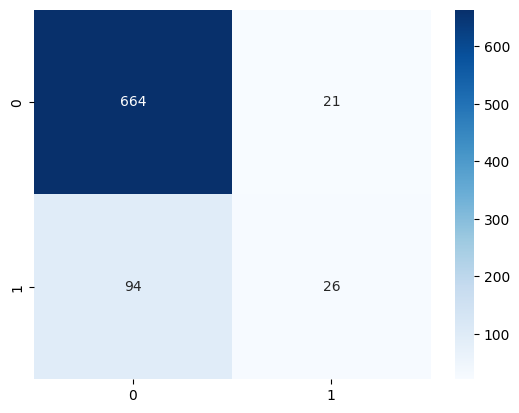

In [20]:
confusion_mat = confusion_matrix(Y_test, knn_classifier.predict(X_test))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.show()

In [21]:
print(classification_report(Y_test, knn_classifier.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       685
         1.0       0.55      0.22      0.31       120

    accuracy                           0.86       805
   macro avg       0.71      0.59      0.62       805
weighted avg       0.83      0.86      0.83       805



In [27]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
X = df.drop('Status_Dead', axis=1)
y = df['Status_Dead'].astype('int')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       685
           1       0.53      0.58      0.56       120

    accuracy                           0.86       805
   macro avg       0.73      0.75      0.74       805
weighted avg       0.87      0.86      0.86       805

[[624  61]
 [ 50  70]]
